<a href="https://colab.research.google.com/github/Tech-Natra/notch_ml_project/blob/main/notebook/ML_Forecasting_Sales_Per_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
# loading packages
# basic + dates
import numpy as np
import pandas as pd
import scipy as sp

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

In [18]:
import warnings
warnings.filterwarnings("ignore")

###Strategy for Developing a Forecast Model on Sales Data

1. Data Extraction / Processing and Transformation
2. Run Python Profiler for Data Exploration.
3. Identify the Business Objective : Forecast Sales Per Customer for Next Month
4. Perform Exploratory Data Analysis and discover the predictive power of predictors.
5. Perform Feature Engineering and extract the feature importance.
6. Explore/Probe Time Series Aspect such lags, trends and seasonality.
7. Build a forecasting model.
8. Run the model to predict the output for future.

###Step 0: Data Pull

In [19]:
# Download and unzip our zipfile
from urllib.request import urlopen
from zipfile import ZipFile

zipurl = 'https://github.com/Tech-Natra/notch_ml_project/raw/main/Data/sales/rossman_train.csv.zip'
zipresp = urlopen(zipurl) # Create a new file on the hard drive
tempzip = open("/tmp/tempfile.zip", "wb") # Write the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly-created file
tempzip.close() # Re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip") # Extract its contents into <extraction_path>
zf.extractall(path = '') # note that extractall will automatically create the path, left blank so it's in working directory
# close the ZipFile instance
zf.close()

###Step 1: Data Loading & Processing

In [20]:
# Loading our Datasets
ross_data = pd.read_csv("rossman_train.csv", parse_dates = True)

In [21]:
ross_data.shape

(1017209, 9)

In [22]:
ross_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [23]:
ross_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [24]:
ross_data["DayOfWeek"] = ross_data["DayOfWeek"].astype("category")

In [25]:
ross_data["Open"] = ross_data["Open"].astype("category")
ross_data["Promo"] = ross_data["Promo"].astype("category")
ross_data["StateHoliday"] = ross_data["StateHoliday"].astype("str").astype("category")
ross_data["SchoolHoliday"] = ross_data["SchoolHoliday"].astype("category")

In [26]:
ross_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype   
---  ------         --------------    -----   
 0   Store          1017209 non-null  int64   
 1   DayOfWeek      1017209 non-null  category
 2   Date           1017209 non-null  object  
 3   Sales          1017209 non-null  int64   
 4   Customers      1017209 non-null  int64   
 5   Open           1017209 non-null  category
 6   Promo          1017209 non-null  category
 7   StateHoliday   1017209 non-null  category
 8   SchoolHoliday  1017209 non-null  category
dtypes: category(5), int64(3), object(1)
memory usage: 35.9+ MB


In [27]:
ross_data["Sales_Per_Customer"] = ross_data["Sales"] / ross_data["Customers"]

In [28]:
ross_data["Date"] = pd.to_datetime(ross_data.Date,
                                   format='%Y-%m-%d',
                                   errors='ignore')

In [29]:
ross_data["Year"] = ross_data["Date"].dt.year
ross_data["Month"] = ross_data["Date"].dt.month
ross_data["Day"] = ross_data["Date"].dt.day

In [30]:
ross_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Sales_Per_Customer,Year,Month,Day
0,1,5,2015-07-31,5263,555,1,1,0,1,9.482883,2015,7,31
1,2,5,2015-07-31,6064,625,1,1,0,1,9.702400,2015,7,31
2,3,5,2015-07-31,8314,821,1,1,0,1,10.126675,2015,7,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,9.342457,2015,7,31
4,5,5,2015-07-31,4822,559,1,1,0,1,8.626118,2015,7,31


###Step 3: Run Profiler

In [31]:
%pip install ydata_profiling

In [32]:
from ydata_profiling import ProfileReport

In [33]:
profile =  ProfileReport(ross_data)

In [34]:
profile.to_file("/content/output.html")

###Step 3: EDA Analysis

In [35]:
"Total Number of Record",len(ross_data)

('Total Number of Record', 1017209)

In [36]:
"Total Number of Record with Zero Sale",len(ross_data[ross_data.Sales == 0])

('Total Number of Record with Zero Sale', 172871)

<Figure size 1000x600 with 0 Axes>

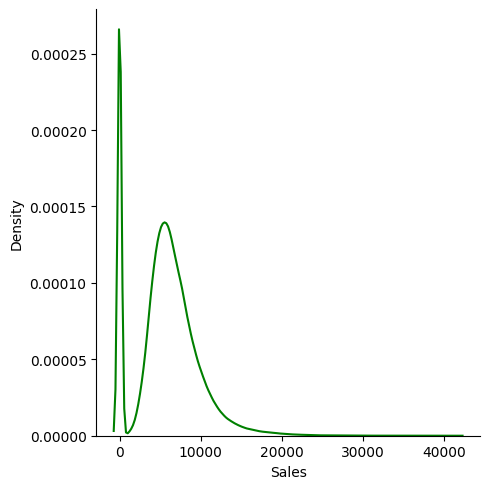

In [37]:
import numpy as np
plt.figure(figsize=(10,6))
sns.displot(ross_data.Sales, kind = "kde", color="green")

<Figure size 1000x600 with 0 Axes>

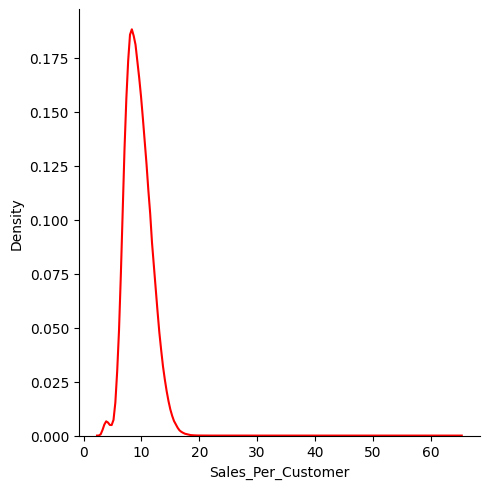

In [38]:
plt.figure(figsize=(10,6))
sns.displot(ross_data[ross_data.Sales != 0].Sales_Per_Customer,
            kind = "kde", color="red")

<Figure size 1000x600 with 0 Axes>

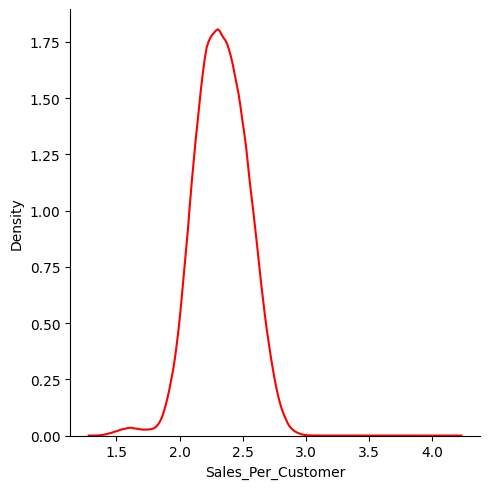

In [39]:
plt.figure(figsize=(10,6))
sns.displot(np.log1p(ross_data[ross_data.Sales != 0].Sales_Per_Customer),
            kind = "kde", color="red")

<Figure size 1000x600 with 0 Axes>

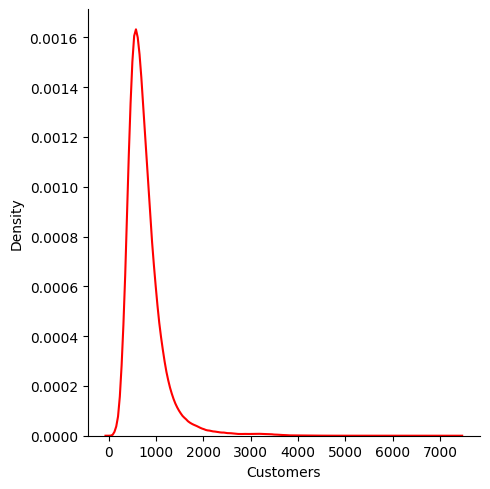

In [40]:
plt.figure(figsize=(10,6))
sns.displot(ross_data[ross_data.Sales != 0].Customers,
            kind = "kde", color="red")

<Axes: xlabel='Sales_Per_Customer', ylabel='DayOfWeek'>

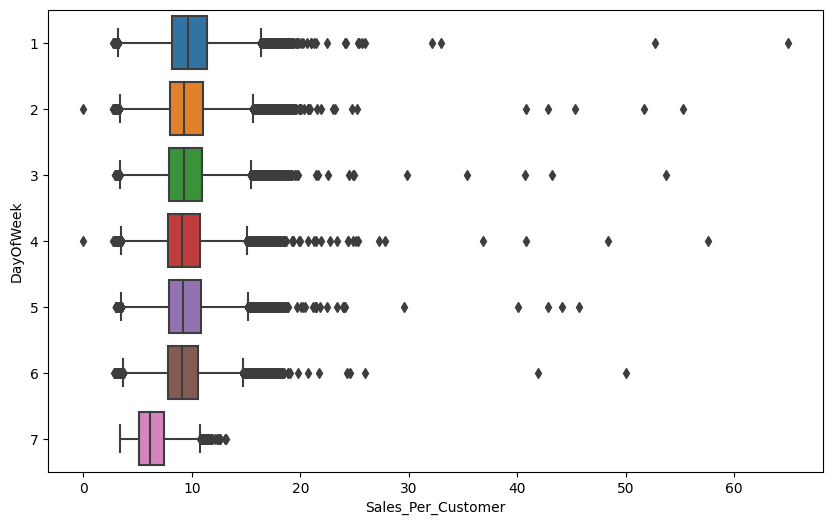

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(data = ross_data,
            x="Sales_Per_Customer", y="DayOfWeek")

In [42]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [43]:
model = ols('Sales_Per_Customer ~ C(DayOfWeek)',
            data=ross_data[["Sales_Per_Customer", "DayOfWeek"]]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [44]:
anova_table

,sum_sq,df,F,PR(>F)
C(DayOfWeek),6.768392e+04,6.0,2375.448177,0.0
Residual,4.009613e+06,844333.0,NaN,NaN


<Axes: xlabel='Sales_Per_Customer', ylabel='Open'>

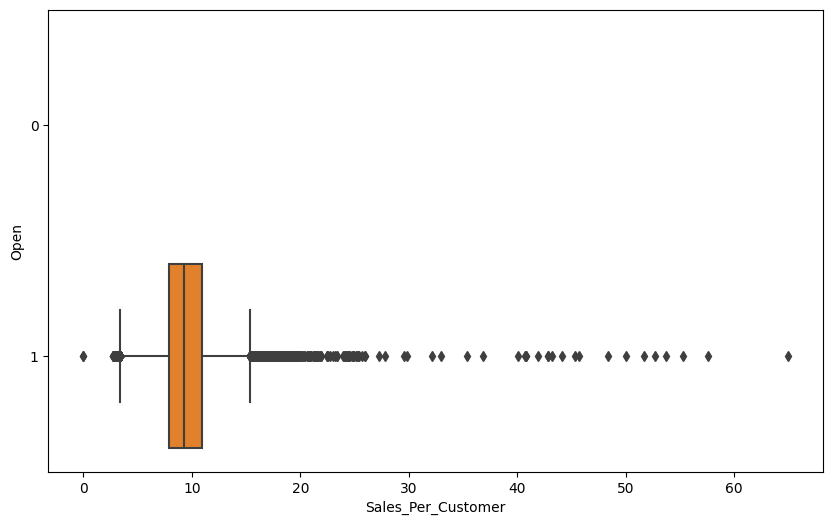

In [45]:
plt.figure(figsize=(10,6))
sns.boxplot(data = ross_data,
            x="Sales_Per_Customer", y="Open")

In [46]:
model = ols('Sales_Per_Customer ~ C(Open)',
            data=ross_data[["Sales_Per_Customer", "Open"]]).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [47]:
anova_table

,sum_sq,df,F,PR(>F)
C(Open),1.053430e-04,1.0,0.000022,0.996273
Residual,4.077298e+06,844338.0,NaN,NaN


<Axes: xlabel='Sales_Per_Customer', ylabel='Promo'>

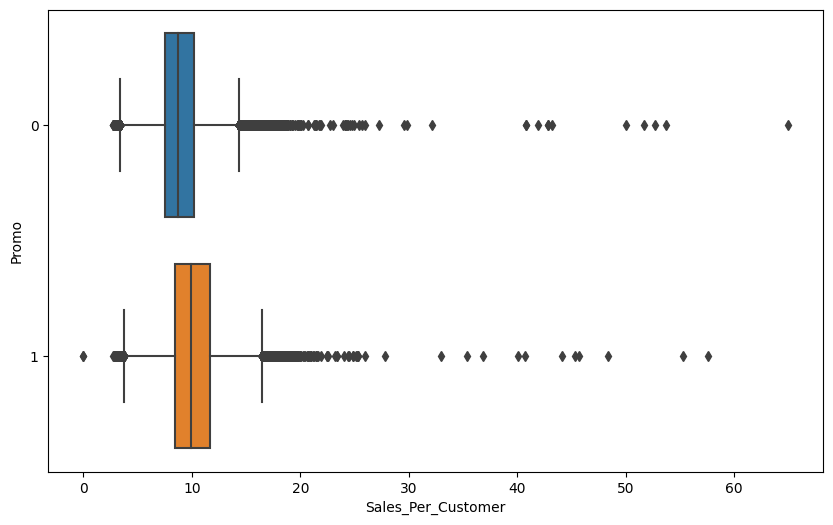

In [48]:
plt.figure(figsize=(10,6))
sns.boxplot(data = ross_data,
            x="Sales_Per_Customer", y="Promo")

<Axes: xlabel='Sales_Per_Customer', ylabel='StateHoliday'>

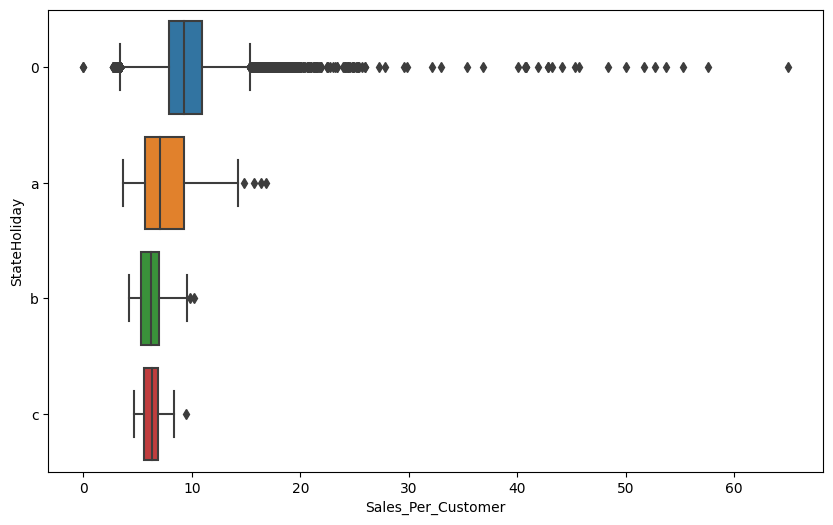

In [49]:
plt.figure(figsize=(10,6))
sns.boxplot(data = ross_data,
            x="Sales_Per_Customer", y="StateHoliday")

<Axes: xlabel='Sales_Per_Customer', ylabel='SchoolHoliday'>

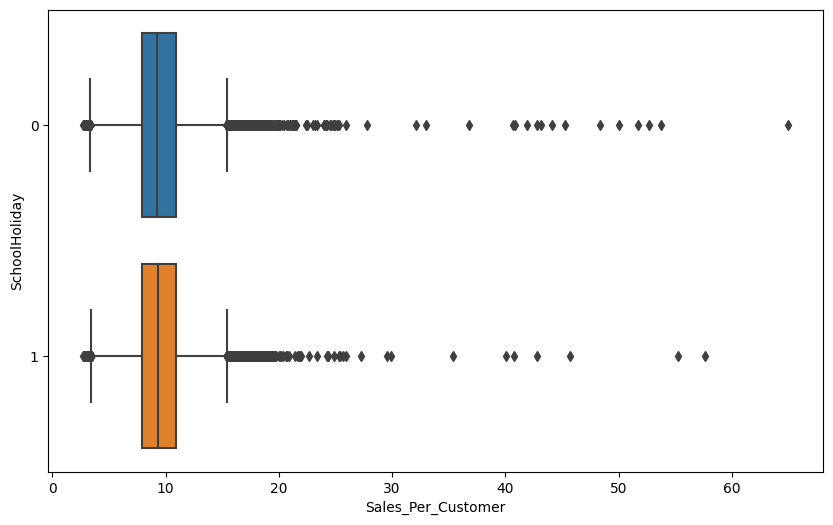

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(data = ross_data[ross_data.Sales != 0],
            x="Sales_Per_Customer", y="SchoolHoliday")

###Step 4: Feature Importance

In [51]:
predictor_columns = ["DayOfWeek",	"Promo",
                     "StateHoliday"]
X = ross_data[ross_data.Sales != 0][predictor_columns].dropna()
y = ross_data[ross_data.Sales != 0].Sales_Per_Customer.dropna()

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42)

In [53]:
"Number of Training Examples", len(X_train), "Number of Test Examples", len(X_test)

('Number of Training Examples', 633253, 'Number of Test Examples', 211085)

In [54]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ["DayOfWeek", "Promo",
                       "StateHoliday" ]

preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)

In [55]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline

sales_per_cust_model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(
        regressor=Ridge(alpha=1e-10),
        func=np.log1p, inverse_func=sp.special.exp1
    ),
)

In [56]:
sales_per_cust_model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['DayOfWeek', 'Promo',
                                                   'StateHoliday'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log1p'>,
                                            inverse_func=<ufunc 'exp1'>,
                                            regressor=Ridge(alpha=1e-10)))])

In [57]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

mae_train = median_absolute_error(y_train, sales_per_cust_model.predict(X_train))
y_pred = sales_per_cust_model.predict(X_test)
mae_test = median_absolute_error(y_test, y_pred)
scores = {
    "MedAE on training set": f"{mae_train:.2f} $",
    "MedAE on testing set": f"{mae_test:.2f} $",
}

scores

{'MedAE on training set': '9.22 $', 'MedAE on testing set': '9.21 $'}

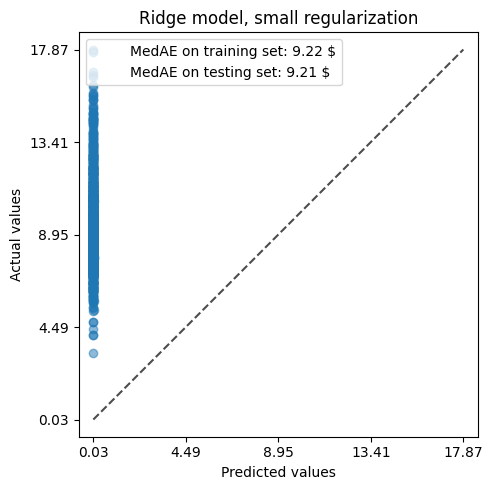

In [58]:
_, ax = plt.subplots(figsize=(5, 5))
display = PredictionErrorDisplay.from_predictions(
    y_test, y_pred, kind="actual_vs_predicted", ax=ax, scatter_kwargs={"alpha": 0.5}
)
ax.set_title("Ridge model, small regularization")
for name, score in scores.items():
    ax.plot([], [], " ", label=f"{name}: {score}")
ax.legend(loc="upper left")
plt.tight_layout()

In [59]:
feature_names = sales_per_cust_model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    sales_per_cust_model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names,
)

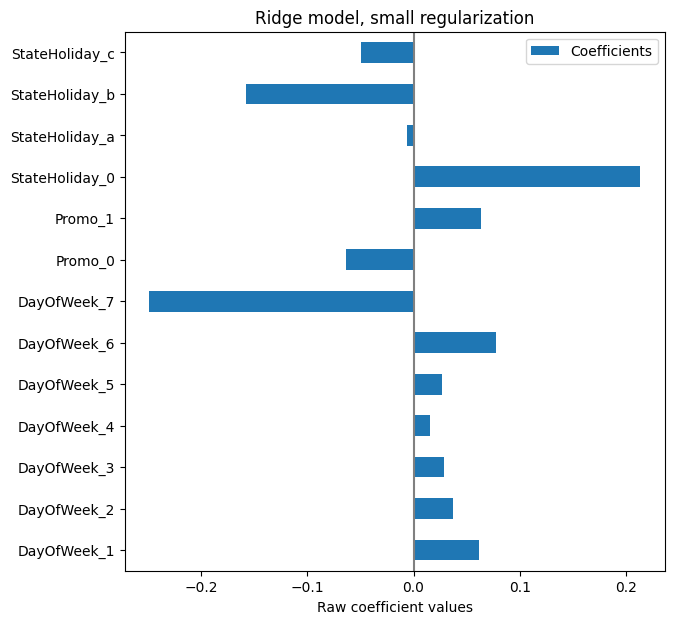

In [60]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

In [61]:
from sklearn.model_selection import RepeatedKFold, cross_validate

cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model = cross_validate(
    sales_per_cust_model,
    X,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)

In [62]:
coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(X, y))
    ],
    columns=feature_names,
)

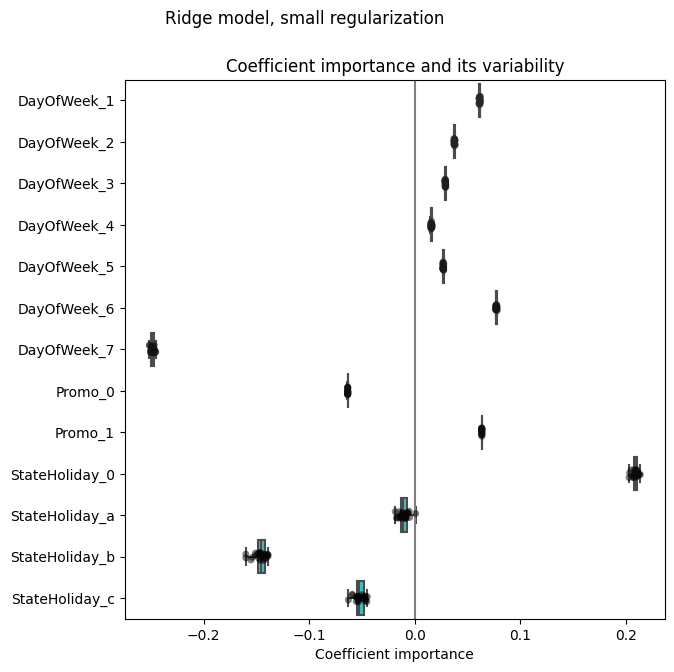

In [63]:
plt.figure(figsize=(9, 7))
sns.stripplot(data=coefs, orient="h", palette="dark:k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5, whis=10)
plt.axvline(x=0, color=".5")
plt.xlabel("Coefficient importance")
plt.title("Coefficient importance and its variability")
plt.suptitle("Ridge model, small regularization")
plt.subplots_adjust(left=0.3)

In [64]:
predictor_columns = ["DayOfWeek",	"Promo",
                     "StateHoliday" ]
X = ross_data[ross_data.Sales != 0][predictor_columns].dropna()
y = ross_data[ross_data.Sales != 0].Sales_Per_Customer.dropna()

In [65]:
factor_state_holiday_code, unique_state_codes = pd.factorize(X["StateHoliday"])
X["StateHoliday"] = factor_state_holiday_code

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, random_state=42)

In [67]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

RandomForestRegressor()

<Axes: >

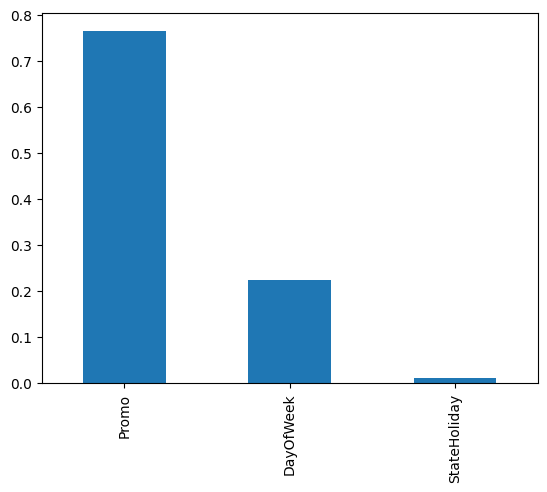

In [68]:
# Create a series containing feature importances from the model and feature names from the training data
feature_importances = pd.Series(rf_model.feature_importances_,
                                index=X_train.columns).sort_values(ascending=False)

# Plot a simple bar chart
feature_importances.plot.bar()

In [69]:
"Test Score", rf_model.score(X_test, y_test)

('Test Score', 0.10207142321535545)

###Step 5: Exploring Time Feature

In [70]:
ross_data["Date"].dt.year.unique()

array([2015, 2014, 2013])

Text(0.5, 1.0, 'Time Series of Sales Per Customer')

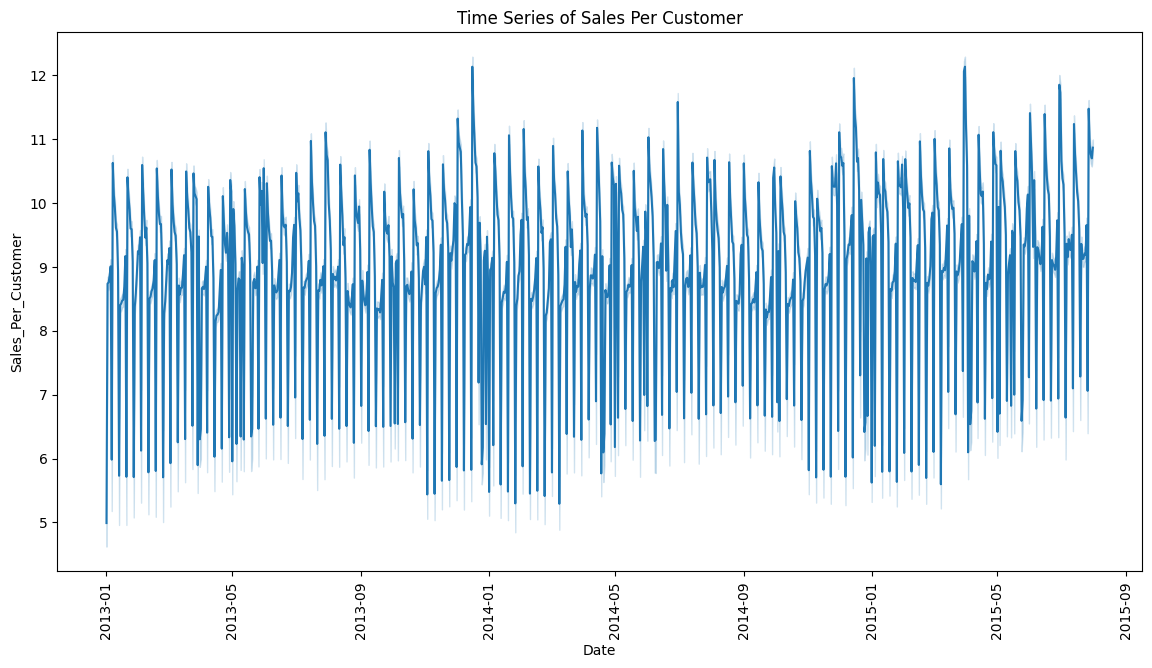

In [71]:
plt.figure(figsize=(14,7))
sns.lineplot(x = "Date", y = "Sales_Per_Customer",
             data = ross_data)

plt.xticks(rotation = 90)
plt.title("Time Series of Sales Per Customer")

<Axes: xlabel='Date', ylabel='Sales_Per_Customer'>

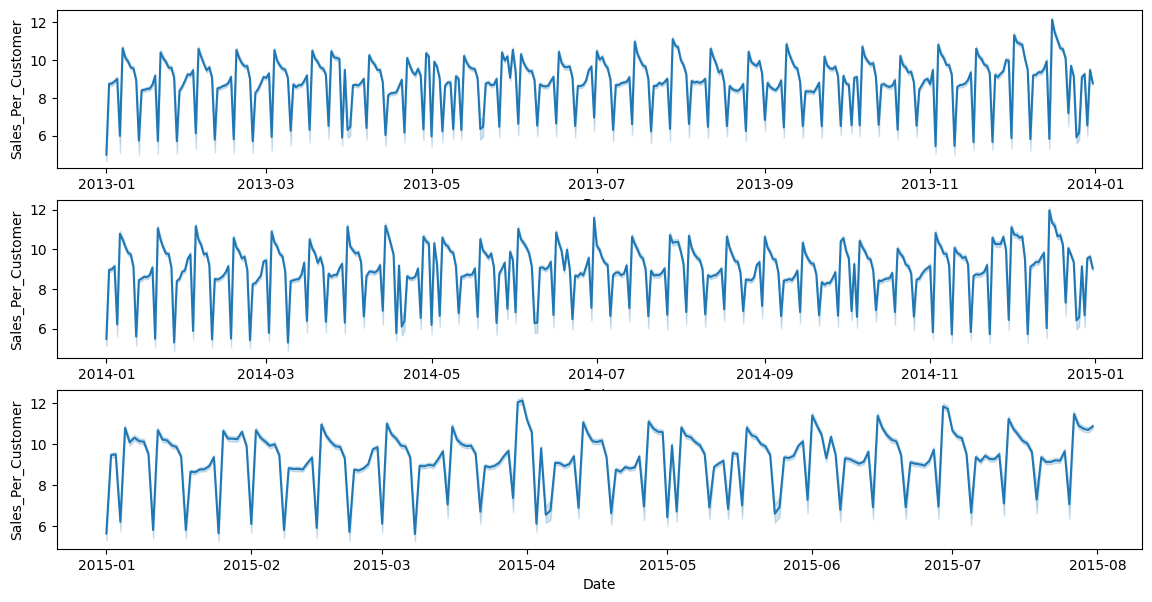

<Figure size 1400x1100 with 0 Axes>

In [72]:
fig, axs = plt.subplots(nrows = 3,ncols = 1, figsize=(14,7))

plt.figure(figsize=(14,11))
sns.lineplot(x = "Date", y = "Sales_Per_Customer",
             data = ross_data[ross_data["Date"].dt.year == 2013], ax= axs[0])

#axs[0].set_title("Time Series For Year 2013", fontdict = {'fontsize': 7})

sns.lineplot(x = "Date", y = "Sales_Per_Customer",
             data = ross_data[ross_data["Date"].dt.year == 2014], ax= axs[1])

#axs[1].set_title("Time Series For Year 2014", fontdict = {'fontsize': 7})

sns.lineplot(x = "Date", y = "Sales_Per_Customer",
             data = ross_data[ross_data["Date"].dt.year == 2015], ax= axs[2])

#axs[2].set_title("Time Series For Year 2015", fontdict = {'fontsize': 7})

In [73]:
def concat_func(x):
  return str(x["Month"]) + "-" + str(x["Day"])
ross_data["Day_Month"] = ross_data.apply(concat_func, axis = 1)

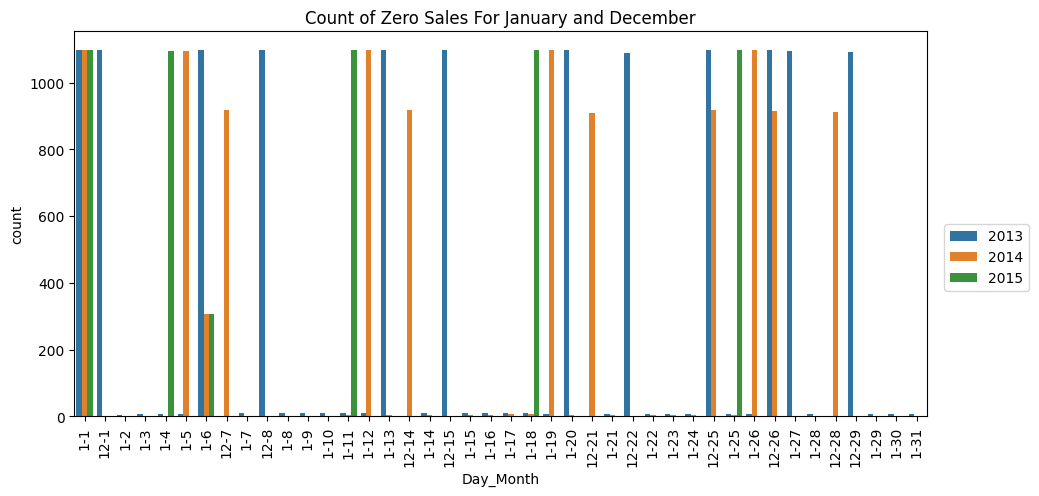

In [74]:
plt.figure(figsize=(11,5))

sns.countplot(data=ross_data[(ross_data.Sales == 0) & (ross_data.Month.isin([1, 12]))].sort_values("Day") , x="Day_Month", hue = "Year")
plt.xticks(rotation = 90)
plt.title("Count of Zero Sales For January and December")
plt.legend(bbox_to_anchor=(1.02, 0.50), loc='upper left', borderaxespad=0)
print()

In [75]:
ts_ross_data = ross_data.groupby("Date").agg({'Sales': np.sum,
                                              'Customers':np.sum,
                                              'Promo': 'first',
                                              'DayOfWeek': 'first' })

In [76]:
ts_ross_data["Sales_Per_Customer"] = ts_ross_data["Sales"] / ts_ross_data["Customers"]

In [77]:
ts_ross_data.head()

,Sales,Customers,Promo,DayOfWeek,Sales_Per_Customer
Date,,,,,
2013-01-01,97235,19491,0,2,4.988713
2013-01-02,6949829,834075,0,3,8.332379
2013-01-03,6347820,761040,0,4,8.340981
2013-01-04,6638954,782137,0,5,8.488224
2013-01-05,5951593,687472,0,6,8.657215


In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

additive_decomposition = seasonal_decompose(ts_ross_data['Sales_Per_Customer'],
                                            model='additive')

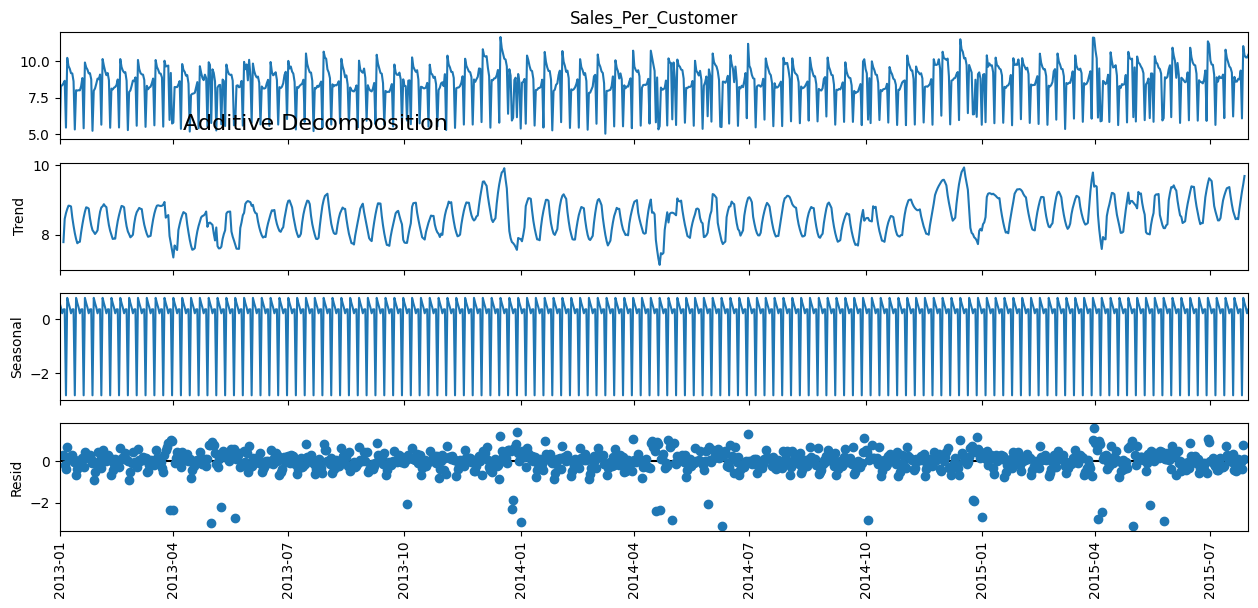

In [79]:
additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 2, 1.3])
plt.xticks(rotation = 90)
print()

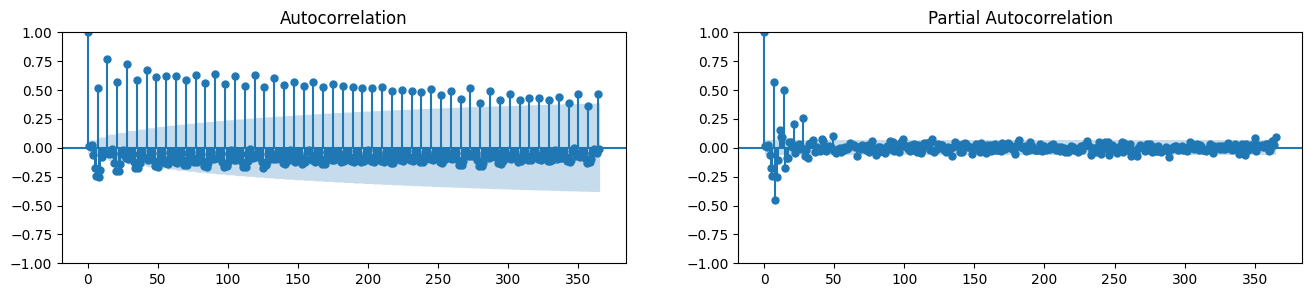

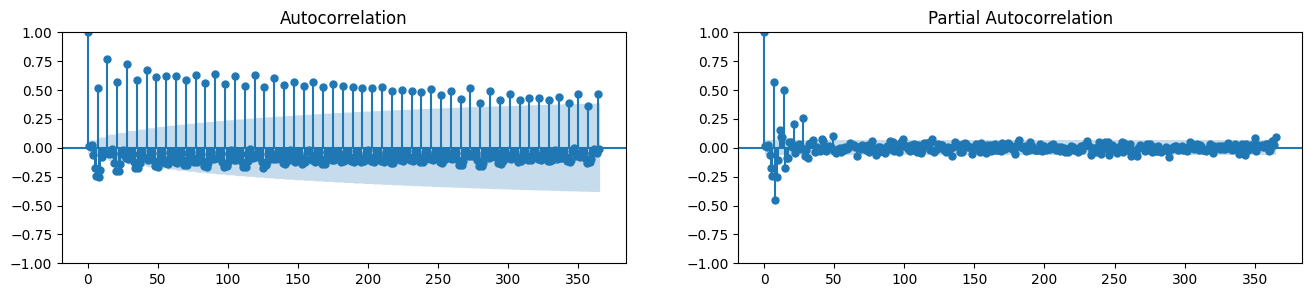

In [80]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Draw Plot
fig, axes = plt.subplots(1,2,figsize=(16,3), dpi= 100)
plot_acf(ts_ross_data['Sales_Per_Customer'].tolist(), lags=365, ax=axes[0])
plot_pacf(ts_ross_data['Sales_Per_Customer'].tolist(), lags=365, ax=axes[1])

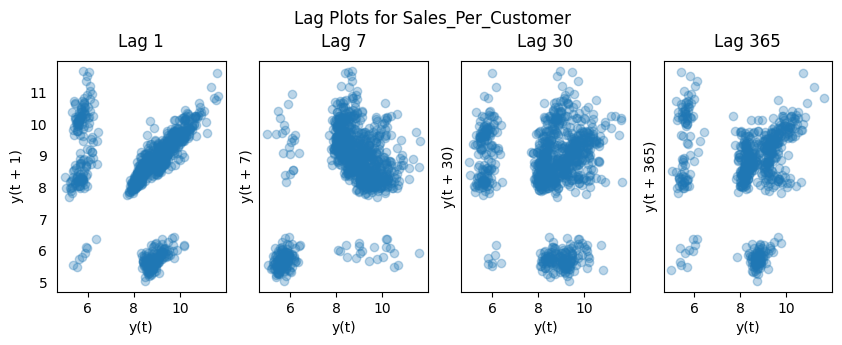

In [81]:
from pandas.plotting import lag_plot
plt.rcParams.update({'ytick.left' : False, 'axes.titlepad':10})

date_value = [1, 7, 30, 365]
# Plot
fig, axes = plt.subplots(1, 4, figsize=(10,3), sharex=True,
                         sharey=True, dpi=100)
for i, ax in enumerate(axes.flatten()[:4]):
    lag_plot(ts_ross_data['Sales_Per_Customer'],
             lag=date_value[i], ax=ax, alpha = 0.3)
    ax.set_title('Lag ' + str(date_value[i]))

fig.suptitle('Lag Plots for Sales_Per_Customer', y=1.05)
plt.show()

In [82]:
ts_ross_data["Year"] = ts_ross_data.index.year
ts_ross_data["Sales_Per_Customer_Year_Back"] = ts_ross_data["Sales_Per_Customer"].shift(365)

<Axes: xlabel='Sales_Per_Customer', ylabel='Sales_Per_Customer_Year_Back'>

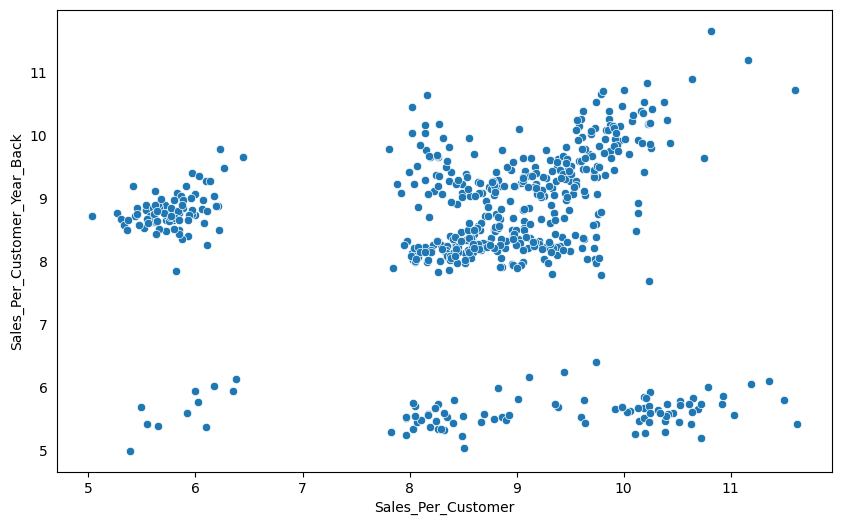

In [83]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = ts_ross_data, x = "Sales_Per_Customer",
                y = "Sales_Per_Customer_Year_Back")

<Axes: xlabel='Sales_Per_Customer', ylabel='Sales_Per_Customer_Year_Back'>

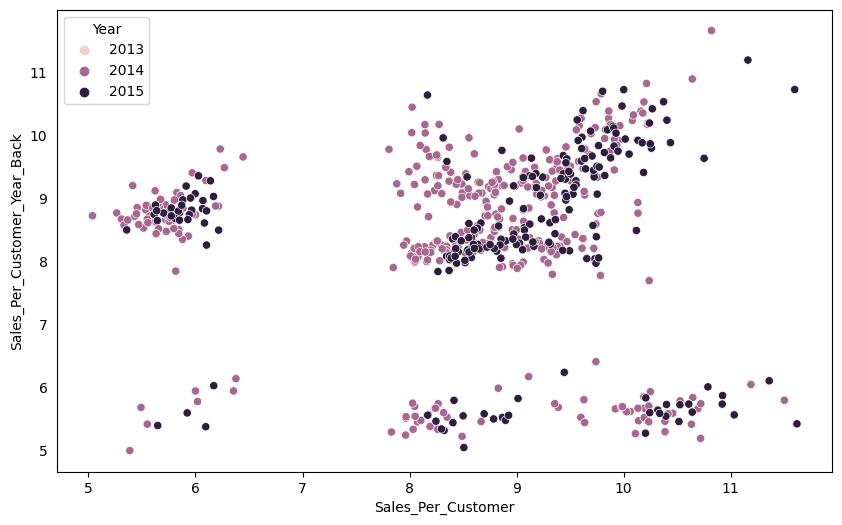

In [84]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = ts_ross_data, x = "Sales_Per_Customer",
                y = "Sales_Per_Customer_Year_Back", hue = "Year")

<Axes: xlabel='Sales_Per_Customer', ylabel='Sales_Per_Customer_Year_Back'>

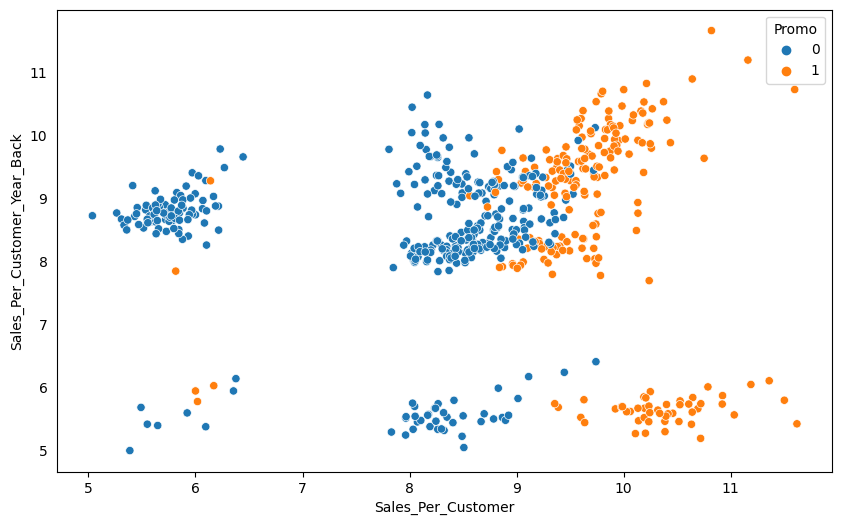

In [85]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = ts_ross_data, x = "Sales_Per_Customer",
                y = "Sales_Per_Customer_Year_Back", hue = "Promo")

<Axes: xlabel='Sales_Per_Customer', ylabel='Sales_Per_Customer_Year_Back'>

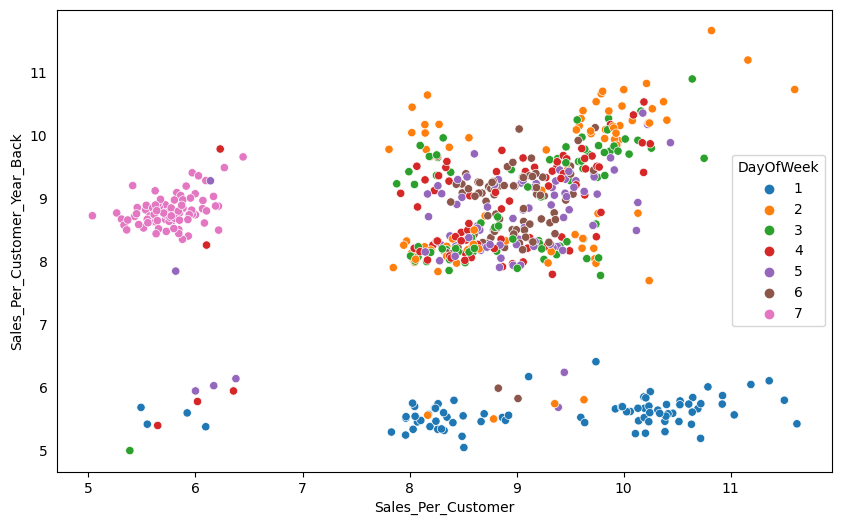

In [86]:
plt.figure(figsize=(10,6))
sns.scatterplot(data = ts_ross_data, x = "Sales_Per_Customer",
                y = "Sales_Per_Customer_Year_Back", hue = "DayOfWeek")

<Axes: xlabel='Sales_Per_Customer', ylabel='Sales_Per_Customer_Year_Back'>

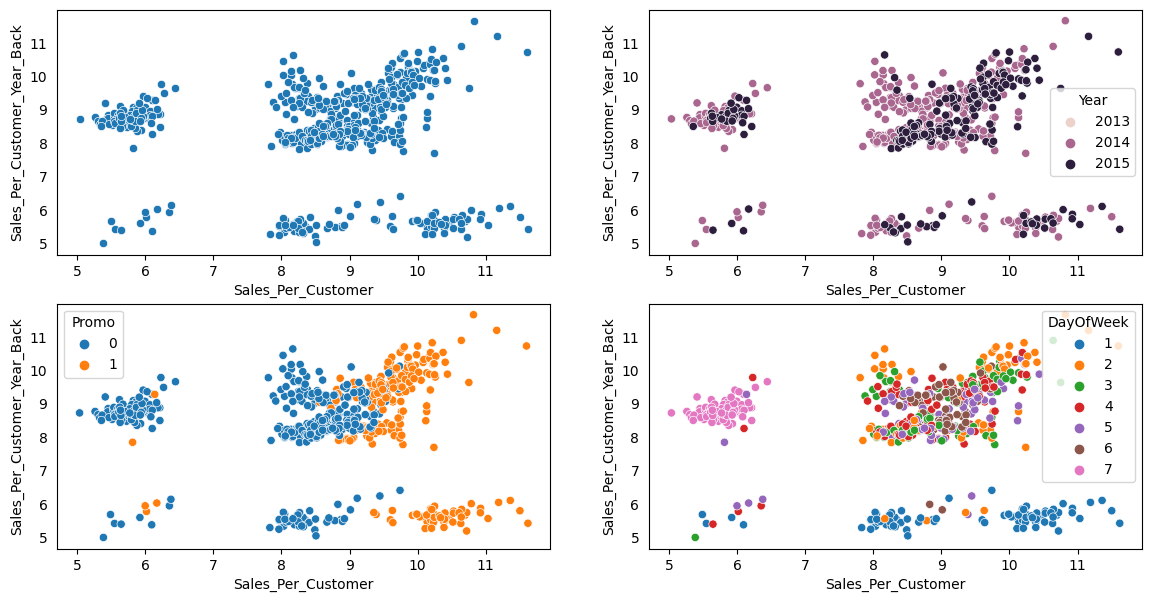

In [87]:
fig, axs = plt.subplots(nrows = 2,ncols = 2, figsize=(14,7))
sns.scatterplot(data = ts_ross_data, x = "Sales_Per_Customer",
                y = "Sales_Per_Customer_Year_Back", ax = axs[0][0])

sns.scatterplot(data = ts_ross_data, x = "Sales_Per_Customer",
                y = "Sales_Per_Customer_Year_Back", hue = "Year", ax = axs[0][1])

sns.scatterplot(data = ts_ross_data, x = "Sales_Per_Customer",
                y = "Sales_Per_Customer_Year_Back", hue = "Promo", ax = axs[1][0])

sns.scatterplot(data = ts_ross_data, x = "Sales_Per_Customer",
                y = "Sales_Per_Customer_Year_Back", hue = "DayOfWeek", ax = axs[1][1])

###Step 6: Forecast Model Process

In [153]:
train_ross_data = ross_data.groupby("Date").agg({'Sales': np.sum,
                                                 'Customers':np.sum,
                                                 'Promo': 'first',
                                                 'DayOfWeek': 'first' })

In [154]:
train_ross_data.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06', '2013-01-07', '2013-01-08',
               '2013-01-09', '2013-01-10',
               ...
               '2015-07-22', '2015-07-23', '2015-07-24', '2015-07-25',
               '2015-07-26', '2015-07-27', '2015-07-28', '2015-07-29',
               '2015-07-30', '2015-07-31'],
              dtype='datetime64[ns]', name='Date', length=942, freq=None)

In [155]:
train_ross_data["Sales_Per_Customer"] = train_ross_data["Sales"] / train_ross_data["Customers"]

In [156]:
train_ross_data["Sales_Per_Customer_Year_Back"] = train_ross_data["Sales_Per_Customer"].shift(365)

In [157]:
train_ross_data.columns

Index(['Sales', 'Customers', 'Promo', 'DayOfWeek', 'Sales_Per_Customer',
       'Sales_Per_Customer_Year_Back'],
      dtype='object')

In [158]:
feature_list = ['Promo', 'DayOfWeek',
 'Sales_Per_Customer_Year_Back', 'Sales_Per_Customer']

In [159]:
ts_train_ross_data = train_ross_data.dropna()

In [160]:
len(ts_train_ross_data)

577

In [161]:
ts_train_ross_data.head()

,Sales,Customers,Promo,DayOfWeek,Sales_Per_Customer,Sales_Per_Customer_Year_Back
Date,,,,,,
2014-01-01,118108,21925,0,3,5.386910,4.988713
2014-01-02,6980556,818375,0,4,8.529777,8.332379
2014-01-03,7024253,818253,0,5,8.584451,8.340981
2014-01-04,6357259,723684,0,6,8.784579,8.488224
2014-01-05,184905,32322,0,7,5.720717,8.657215


In [162]:
from sklearn.model_selection import TimeSeriesSplit
tscv = TimeSeriesSplit(n_splits=11, test_size=30)

In [163]:
for i, (train_index, test_index) in enumerate(tscv.split(ts_train_ross_data)):
  print(f"Fold {i}:")
  print(f"  Train: index={len(train_index)}")
  print(f"  Test:  index={len(test_index)}")

Fold 0:
  Train: index=247
  Test:  index=30
Fold 1:
  Train: index=277
  Test:  index=30
Fold 2:
  Train: index=307
  Test:  index=30
Fold 3:
  Train: index=337
  Test:  index=30
Fold 4:
  Train: index=367
  Test:  index=30
Fold 5:
  Train: index=397
  Test:  index=30
Fold 6:
  Train: index=427
  Test:  index=30
Fold 7:
  Train: index=457
  Test:  index=30
Fold 8:
  Train: index=487
  Test:  index=30
Fold 9:
  Train: index=517
  Test:  index=30
Fold 10:
  Train: index=547
  Test:  index=30


In [164]:
ts_train_ross_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 577 entries, 2014-01-01 to 2015-07-31
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype   
---  ------                        --------------  -----   
 0   Sales                         577 non-null    int64   
 1   Customers                     577 non-null    int64   
 2   Promo                         577 non-null    category
 3   DayOfWeek                     577 non-null    category
 4   Sales_Per_Customer            577 non-null    float64 
 5   Sales_Per_Customer_Year_Back  577 non-null    float64 
dtypes: category(2), float64(2), int64(2)
memory usage: 24.1 KB


In [165]:
X = ts_train_ross_data[['Promo', 'DayOfWeek',
                        'Sales_Per_Customer_Year_Back']]
y = ts_train_ross_data["Sales_Per_Customer"]

In [166]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

categorical_columns = ['Promo', 'DayOfWeek']

preprocessor = make_column_transformer(
    (OneHotEncoder(), categorical_columns),
    remainder="passthrough",
    verbose_feature_names_out=False,  # avoid to prepend the preprocessor names
)

In [167]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

In [168]:
ridge_param_grid = {
    "reg__alpha": [1e-10, 1e-5, 1e-2, 1]
}

In [169]:
lm_sales_reg = Pipeline([
    ("encode",preprocessor),
    ("reg", Ridge(random_state = 42))
])

In [170]:
lm_model_gv = GridSearchCV(lm_sales_reg,
                           ridge_param_grid,
                           cv = tscv)

In [171]:
lm_model_gv.fit(X, y)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=11, test_size=30),
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['Promo',
                                                                          'DayOfWeek'])],
                                                          verbose_feature_names_out=False)),
                                       ('reg', Ridge(random_state=42))]),
             param_grid={'reg__alpha': [1e-10, 1e-05, 0.01, 1]})

In [172]:
print(lm_model_gv)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=11, test_size=30),
             estimator=Pipeline(steps=[('encode',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(),
                                                                         ['Promo',
                                                                          'DayOfWeek'])],
                                                          verbose_feature_names_out=False)),
                                       ('reg', Ridge(random_state=42))]),
             param_grid={'reg__alpha': [1e-10, 1e-05, 0.01, 1]})


In [173]:
lm_model_gv.best_params_

{'reg__alpha': 1e-10}

In [174]:
lm_model_gv.best_estimator_.fit(X, y)

Pipeline(steps=[('encode',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(),
                                                  ['Promo', 'DayOfWeek'])],
                                   verbose_feature_names_out=False)),
                ('reg', Ridge(alpha=1e-10, random_state=42))])

In [175]:
pd.DataFrame(lm_model_gv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_reg__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,split10_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007683,0.001301,0.005338,0.001381,0.0,{'reg__alpha': 1e-10},0.747080,0.909773,0.947991,0.757074,0.931370,0.897889,0.818404,0.568653,0.734941,0.864142,0.858319,0.821421,0.107024,1
1,0.008493,0.002719,0.005017,0.001004,0.00001,{'reg__alpha': 1e-05},0.747080,0.909773,0.947991,0.757074,0.931370,0.897889,0.818404,0.568653,0.734941,0.864142,0.858319,0.821421,0.107024,2
2,0.006918,0.000667,0.004281,0.000583,0.01,{'reg__alpha': 0.01},0.747050,0.909832,0.947975,0.756941,0.931392,0.897901,0.818392,0.568663,0.734971,0.864136,0.858309,0.821415,0.107034,3
3,0.007042,0.000695,0.004190,0.000329,1,{'reg__alpha': 1},0.743857,0.914910,0.946100,0.744221,0.933068,0.898808,0.817023,0.569380,0.737668,0.863373,0.857232,0.820513,0.108001,4


In [176]:
from sklearn.metrics import PredictionErrorDisplay, median_absolute_error

mae_train = median_absolute_error(y, lm_model_gv.best_estimator_.predict(X))

print(f"MedAE on training set :{mae_train:.2f} $")

MedAE on training set :0.27 $


In [177]:
feature_names = lm_model_gv.best_estimator_[0].get_feature_names_out()

coefs = pd.DataFrame(
    lm_model_gv.best_estimator_[-1].coef_,
    columns=["Coefficients"],
    index=feature_names,
)

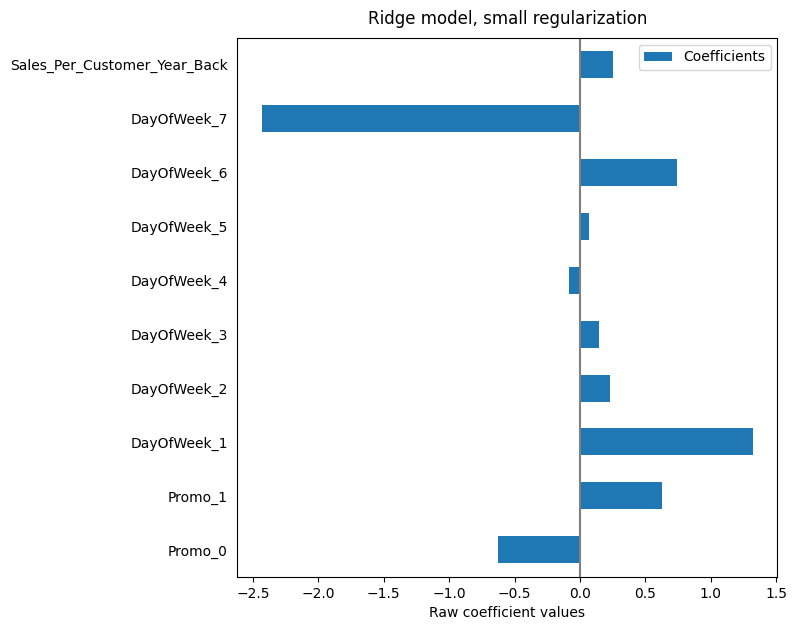

In [178]:
coefs.plot.barh(figsize=(9, 7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

###Step 7: Forecast for Aug 2015

In [145]:
test_df = pd.DataFrame({"Date": pd.date_range(start='2015-08-01',
                                              periods=30)})
test_df["Date"] = pd.to_datetime(test_df.Date, format='%Y-%m-%d',
                                 errors='ignore')

In [146]:
test_df.head()

,Date
0,2015-08-01
1,2015-08-02
2,2015-08-03
3,2015-08-04
4,2015-08-05


In [147]:
test_df["Promo"] = 1
test_df["DayOfWeek"] = test_df["Date"].apply(lambda x: x.weekday() + 1)

In [148]:
test_df["Sales_Per_Customer_Year_Back"] = ts_train_ross_data[ts_train_ross_data.index >= '2014-08-01'].head(n=30)["Sales_Per_Customer"].values

In [149]:
test_df.head()

,Date,Promo,DayOfWeek,Sales_Per_Customer_Year_Back
0,2015-08-01,1,6,9.403523
1,2015-08-02,1,7,8.785389
2,2015-08-03,1,1,5.883603
3,2015-08-04,1,2,10.194698
4,2015-08-05,1,3,9.546596


In [150]:
test_df["forecast_values"] = lm_model_gv.predict(test_df[['Promo',
                                                          'DayOfWeek',
                                                          'Sales_Per_Customer_Year_Back']])

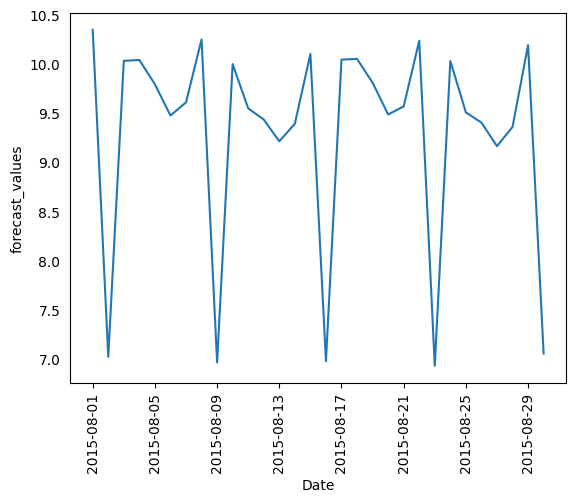

In [151]:
sns.lineplot(data = test_df, x = "Date", y = "forecast_values")
plt.xticks(rotation =90)
print()

<Axes: xlabel='Date', ylabel='Sales_Per_Customer'>

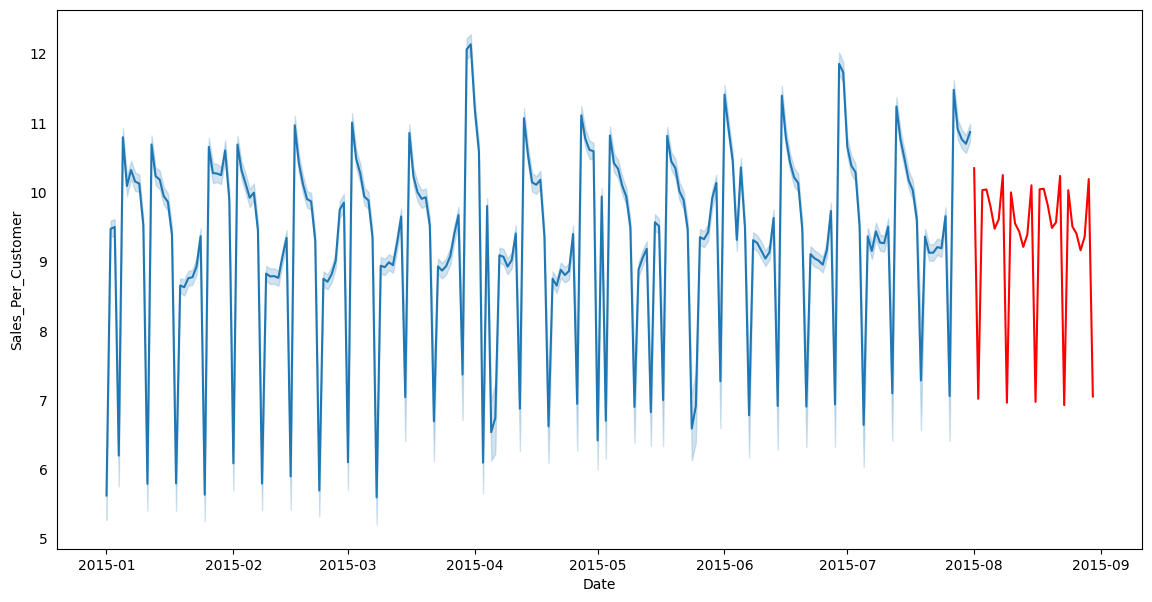

In [152]:
plt.figure(figsize=(14,7))
sns.lineplot(x = "Date", y = "Sales_Per_Customer",
             data = ross_data[ross_data["Date"].dt.year == 2015])
sns.lineplot(data = test_df, x = "Date",
             y = "forecast_values", color = "red")